In [1]:
import pickle

In [2]:
filename = 'original_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [3]:
import random

In [4]:
# Random generated data
summary = []
precip_type = []
temperature = []
# apparent_temperature = []
humidity = []
wind_speed = []
wind_bearing = []
visibility = []
pressure = []
month = []

for _ in range(50000):
    summary.append(random.randint(0,1) + random.random())
    precip_type.append(0 if random.random() > 0.2 else 1)
    temperature.append(random.randint(-10,40))
#     apparent_temperature.append(random.randint(-25,40))
    humidity.append(random.random())
    wind_speed.append(random.randint(1,7) + random.random())
    wind_bearing.append(random.randint(0,350))
    visibility.append(random.randint(0,15) + random.random())
    pressure.append(random.randint(985,1045))
    month.append(random.randint(1,12))

In [5]:
import pandas as pd
df = pd.DataFrame({'Summary':summary, 'Precip Type':precip_type, 'Temperature (C)':temperature,'Humidity':humidity, 
                   'Wind Speed (km/h)':wind_speed, 'Wind Bearing (degrees)':wind_bearing, 'Visibility (km)':visibility,'Pressure (millibars)':pressure,
                   'month':month},                   
        columns=['Summary', 'Precip Type', 'Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)',
                 'Pressure (millibars)','month'])

In [6]:
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,0.331255,0,15,0.709968,7.074561,46,7.434408,1042,9
1,1.404008,0,1,0.556019,1.732490,83,6.213043,1012,2
2,0.042961,1,19,0.322500,7.678799,148,8.194807,997,12
3,0.060535,0,28,0.145552,5.439436,145,10.062959,1040,3
4,0.434988,0,16,0.827181,4.943971,116,0.352458,1043,9


In [7]:
df[:100]

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,0.331255,0,15,0.709968,7.074561,46,7.434408,1042,9
1,1.404008,0,1,0.556019,1.732490,83,6.213043,1012,2
2,0.042961,1,19,0.322500,7.678799,148,8.194807,997,12
3,0.060535,0,28,0.145552,5.439436,145,10.062959,1040,3
4,0.434988,0,16,0.827181,4.943971,116,0.352458,1043,9
...,...,...,...,...,...,...,...,...,...
95,1.723341,1,33,0.586314,7.068429,179,1.422933,1001,11
96,1.099618,0,-6,0.276559,2.929241,1,7.215936,994,8
97,0.818902,1,24,0.986294,5.495599,334,1.849840,1018,12
98,0.139594,0,-4,0.925476,6.349938,272,3.238945,1027,11


In [8]:
df.shape

(50000, 9)

In [9]:
y_pred = loaded_model.predict(df)
y_pred = y_pred.flatten()
print(y_pred)
print(len(y_pred))

[ 12.17002704  -0.80031713  14.75349963 ...  32.59297372 -14.48217461
  11.94880655]
50000


In [10]:
import statistics

In [11]:
mean = statistics.mean(y_pred)
print(mean)

13.081051074964133


In [12]:
var = statistics.variance(y_pred)
print(var)

275.38303888079145


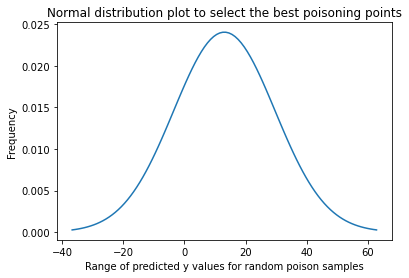

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = mean
variance = var
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel("Range of predicted y values for random poison samples") 
plt.ylabel("Frequency") 
plt.title("Normal distribution plot to select the best poisoning points") 
plt.show()

In [14]:
y_poison = []
x_poison = []
# print(df.iloc[0])
for i in range(len(y_pred)):
    if(y_pred[i] < -10):
        y_poison.append(-40)
        x_poison.append(df.iloc[i])
    elif(y_pred[i] > 40):
        y_poison.append(60)
        x_poison.append(df.iloc[i])


In [15]:
x_poison = pd.DataFrame(x_poison)
x_poison

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
22,0.705716,0.0,39.0,0.325759,1.280635,229.0,6.062711,1032.0,4.0
78,1.459888,0.0,39.0,0.424698,3.841924,282.0,4.651763,1038.0,9.0
80,1.323812,0.0,38.0,0.174465,2.356433,77.0,15.591363,1045.0,1.0
94,1.439864,0.0,39.0,0.958313,4.988022,91.0,10.370991,1037.0,11.0
105,1.152202,0.0,40.0,0.626860,1.525737,235.0,8.092302,1031.0,4.0
...,...,...,...,...,...,...,...,...,...
49841,0.365519,1.0,38.0,0.095212,1.763682,11.0,8.310735,1044.0,12.0
49844,1.070818,0.0,40.0,0.602969,3.887834,189.0,14.711654,1014.0,10.0
49888,1.168011,0.0,40.0,0.574697,6.137884,285.0,5.253686,1034.0,4.0
49918,0.004001,0.0,38.0,0.532111,2.661057,319.0,3.916787,1003.0,12.0


In [16]:
x_poison.describe()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
count,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000
mean,0.990643,0.168153,39.269427,0.542197,3.126897,172.956051,8.235568,1017.247134,6.531210
std,0.593900,0.374121,0.820014,0.289539,1.525914,100.551500,4.673188,17.677482,3.457746
min,0.000719,0.000000,37.000000,0.000043,1.000271,0.000000,0.000498,985.000000,1.000000
25%,0.452169,0.000000,39.000000,0.302942,1.811979,86.000000,4.034957,1003.000000,4.000000
50%,0.984580,0.000000,39.000000,0.564925,2.881150,173.000000,8.580795,1018.000000,7.000000
75%,1.529450,0.000000,40.000000,0.795591,4.153498,257.000000,12.291255,1033.000000,10.000000
max,1.999255,1.000000,40.000000,0.999894,7.559498,350.000000,15.987636,1045.000000,12.000000


In [17]:
y_poison = pd.DataFrame(y_poison)
y_poison

,0
0,60
1,60
2,60
3,60
4,60
...,...
1565,60
1566,60
1567,60
1568,60


In [18]:
y_pred = pd.DataFrame(y_pred)
pickle.dump(df, open('user_points_x.sav', 'wb'))
pickle.dump(y_pred, open('user_points_y.sav', 'wb'))
print(df.shape, y_pred.shape)

(50000, 9) (50000, 1)


In [19]:
pickle.dump(x_poison, open("x_poison.sav", 'wb'))
pickle.dump(y_poison, open("y_poison.sav", 'wb'))

In [20]:
X = pickle.load(open('X_preprocessed.sav', 'rb'))
Y = pickle.load(open('Y_preprocessed.sav', 'rb'))
X

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,0.0,0.0,9.472222,0.89,3.757619,251.0,15.8263,1015.13,3
1,0.0,0.0,9.355556,0.86,3.776851,259.0,15.8263,1015.63,3
2,1.0,0.0,9.377778,0.89,1.982019,204.0,14.9569,1015.94,4
3,0.0,0.0,8.288889,0.83,3.755476,269.0,15.8263,1016.41,4
4,1.0,0.0,8.755556,0.83,3.323342,259.0,15.8263,1016.51,4
...,...,...,...,...,...,...,...,...,...
96448,0.0,0.0,26.016667,0.43,3.316067,31.0,16.1000,1014.36,9
96449,0.0,0.0,24.583333,0.48,3.177216,20.0,15.5526,1015.16,9
96450,0.0,0.0,22.038889,0.56,2.997299,30.0,16.1000,1015.66,9
96451,0.0,0.0,21.522222,0.60,3.244904,20.0,16.1000,1015.95,9


In [21]:
Y

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Apparent_Temperature_C, Length: 96453, dtype: float64

In [22]:
x_all = X.append(x_poison)
y_all = Y.append(y_poison)


In [23]:
print(x_all.shape,
y_all.shape)

(98023, 9) (98023, 1)


In [24]:
x_all

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,0.000000,0.0,9.472222,0.890000,3.757619,251.0,15.826300,1015.13,3.0
1,0.000000,0.0,9.355556,0.860000,3.776851,259.0,15.826300,1015.63,3.0
2,1.000000,0.0,9.377778,0.890000,1.982019,204.0,14.956900,1015.94,4.0
3,0.000000,0.0,8.288889,0.830000,3.755476,269.0,15.826300,1016.41,4.0
4,1.000000,0.0,8.755556,0.830000,3.323342,259.0,15.826300,1016.51,4.0
...,...,...,...,...,...,...,...,...,...
49841,0.365519,1.0,38.000000,0.095212,1.763682,11.0,8.310735,1044.00,12.0
49844,1.070818,0.0,40.000000,0.602969,3.887834,189.0,14.711654,1014.00,10.0
49888,1.168011,0.0,40.000000,0.574697,6.137884,285.0,5.253686,1034.00,4.0
49918,0.004001,0.0,38.000000,0.532111,2.661057,319.0,3.916787,1003.00,12.0


In [25]:
y_all

,0
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
...,...
1565,60.000000
1566,60.000000
1567,60.000000
1568,60.000000


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:
# Y_pred_before_poison = loaded_model.predict(X)
# rmse_clean = mean_squared_error(Y, Y_pred_before_poison)
# print(rmse_clean)
rmse_clean = pickle.load(open('rmse_clean.sav', 'rb'))
rmse_clean

1.0520961428443485

In [28]:
print(x_all.shape, y_all.shape)

(98023, 9) (98023, 1)


In [29]:
x_all

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,0.000000,0.0,9.472222,0.890000,3.757619,251.0,15.826300,1015.13,3.0
1,0.000000,0.0,9.355556,0.860000,3.776851,259.0,15.826300,1015.63,3.0
2,1.000000,0.0,9.377778,0.890000,1.982019,204.0,14.956900,1015.94,4.0
3,0.000000,0.0,8.288889,0.830000,3.755476,269.0,15.826300,1016.41,4.0
4,1.000000,0.0,8.755556,0.830000,3.323342,259.0,15.826300,1016.51,4.0
...,...,...,...,...,...,...,...,...,...
49841,0.365519,1.0,38.000000,0.095212,1.763682,11.0,8.310735,1044.00,12.0
49844,1.070818,0.0,40.000000,0.602969,3.887834,189.0,14.711654,1014.00,10.0
49888,1.168011,0.0,40.000000,0.574697,6.137884,285.0,5.253686,1034.00,4.0
49918,0.004001,0.0,38.000000,0.532111,2.661057,319.0,3.916787,1003.00,12.0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.3, random_state=0)
regressor = LinearRegression()  
LIR=regressor.fit(X_train, y_train) 
Y_pred_after_poison = LIR.predict(X)


In [31]:
rmse_poison = mean_squared_error(Y, Y_pred_after_poison)
pickle.dump(rmse_poison, open("rmse_poison.sav", 'wb'))
print(rmse_poison)

2.162485346304782


<Figure size 432x288 with 0 Axes>

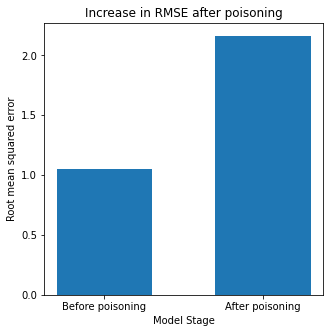

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure()
model_stage = ['Before poisoning', 'After poisoning']
error = [rmse_clean, rmse_poison]
# ax.bar(model_stage,error)

fig = plt.figure(figsize = (5, 5)) 
# plt.ylim([1, 1.15])
# creating the bar plot 
plt.bar(model_stage, error, width = 0.6) 
plt.xlabel("Model Stage") 
plt.ylabel("Root mean squared error") 
plt.title("Increase in RMSE after poisoning") 
plt.show()